# Installation 

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

In [ ]:
!nvcc --version

In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


-----------------------------

-------------------------------------------------------------------------


# 1. Create the program using kernels

In [ ]:
%%cu
#include <iostream>


int main(){
    printf("Hello Google Colab!!");
    return 0;
}

Hello Google Colab!!


In [ ]:
%%cu
#include "cuda_runtime.h"
#include "device_launch_parameters.h"
#include <stdio.h>
#include <stdlib.h>
#include <iostream>

__global__ void hello() {
       printf("Hii from GPU\n");

}

int main() {
    
    hello <<<2, 10>>>();
    cudaDeviceSynchronize();

    cudaDeviceReset();
 

    return 0;

}

In [ ]:
%%cu

#include <iostream>

__global__ void hello() {
       printf("Hii\n");

}

int main() {
    
    hello <<<1, 10>>>();
    cudaDeviceSynchronize();

    cudaDeviceReset();
 

    return 0;

}

In [ ]:
%%cu

#include <iostream>

__global__ void hello() {
       printf("Hii\n");

}

int main() {
  

    
    hello <<<4, 8>>>();
    cudaDeviceSynchronize();

    cudaDeviceReset();
 

    return 0;

}

# 2. Determine how many parallel cuda threads are required.

# Launch Hii from GPU with One Dimensional grid

Arrange a one dimensional grid with **64 threads** in **16 threads blocks** where each block having **4 threads**

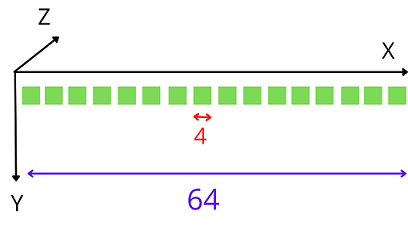


```
 kernel_name <<<grid,block>>>();
 kernel_name<<<number_of_blocks,threads_per_block>>>();
 ```

In [ ]:
%%cu

#include <iostream>

__global__ void hello() {
       printf("Hii from Gpu\n");

}

int main() {
   
   
    hello <<<16, 4>>>();
    cudaDeviceSynchronize();

    cudaDeviceReset();
 

    return 0;

}

```
 dim3 block(4,1,1);
```


```
 dim3 grid(16,1,1);
```
```
 kernel_name <<<grid,block>>>();
 kernel_name<<<number_of_blocks,threads_per_block>>>();
```



In [ ]:
%%cu

#include <iostream>

__global__ void hello() {
       printf("Hii\n");

}

int main() {
    
    dim3 block(4);
    dim3 grid(16);
   
   
    hello <<<grid, block>>>();
    cudaDeviceSynchronize();

    cudaDeviceReset();
 

    return 0;

}





# Launch Hii from GPU with Two Dimensional grid

Arrange a two dimensional grid with 32 threads into 16 threads in X dimension 2 threads in Y dimensions

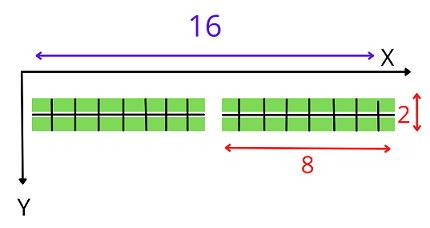

```
 dim3 block(8,2,1);
```


```
 dim3 grid(2,1,1);
```
```
 kernel_name <<<grid,block>>>();
 kernel_name<<<number_of_blocks,threads_per_block>>>();
 ```

In [ ]:
%%cu

#include <iostream>

__global__ void hello() {
       printf("Hii from GPU\n");

}

int main() {
    
    dim3 block(8,2,1);
    dim3 grid(2,1,1);
   
   
    hello <<<grid, block>>>();
    cudaDeviceSynchronize();

    cudaDeviceReset();
 

    return 0;

}

In [ ]:
%%cu

#include <iostream>

__global__ void hello() {
       printf("Hii from GPU\n");

}

int main() {
    
    int nx = 16;
    int ny = 2;
    
    dim3 block(8, 2, 1);
    dim3 grid(nx/block.x, ny/block.y,1);
   
   
    hello <<<grid, block>>>();
    cudaDeviceSynchronize();

    cudaDeviceReset();
 

    return 0;

}

# 3. Use the GPU to allocate memory.



> `int main (void){`

*Declare variables*
> `int *a, *b;`

*Allocate memory on the device*
> `cudaMalloc( (void**)b, sizeof(int));`

*Allocate memory on the device*
> `cudaMemcpy(b, a, sizeof(int), cudaMemcpyHostToDevice);`

*Configuration parameters*
> `dim3 grid_size(1);`
> `dim3 block_size(1);`

*Lanuch the kernel*
> `kernel <<<grid_size,block_size>>>(...);`

*Copy data back to the host*
> `cudaMemcpy(a, b, sizeof(int), cudaMemcpyDeviceToHost);`

*deallocate memory*

> `cudaFree(b), free(a),`

> `return 0;`

> `}`








In [ ]:
%%cu

#include <iostream>

__global__ void summation (int *num1, int *num2, int *Summation){
  *Summation = *num1 * *num2;
	
}

int main(){
    
  int x, y, sum;
	int *DN1, *DN2, *DSum;

	int size = sizeof(int);

	// allocate device memory
	cudaMalloc((void **)&DN1, size);
	cudaMalloc((void **)&DN2, size);
	cudaMalloc((void **)&DSum, size);

	x = 5;
	y = 2;

	//copy from host memory to device memory
	cudaMemcpy(DN1, &x, size, cudaMemcpyHostToDevice);
	cudaMemcpy(DN2, &y, size, cudaMemcpyHostToDevice);


	dim3 block(2, 2);
	dim3 grid(4,2);

	summation << <block, grid >> > (DN1, DN2, DSum);

	cudaMemcpy(&sum, DSum, size, cudaMemcpyDeviceToHost);

	printf("5 x 2 = %d\n", sum);
	cudaFree(DN1);
	cudaFree(DN2);
	cudaFree(DSum);

	return 0;

  cudaDeviceSynchronize();
 
  
}

5 x 2 = 10

